# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:

In [3]:
# Sum for every value (Every value of x minus the mean of x) * (every value of y minus the mean of y)
# Divide by Sum of (Every value of x minus the mean of x) squared * Sum of (every value of y minus the mean of y)


# all coordinates given: (1, 2)(3,9)(5,10)

# create a list of all of the x values
x = (1, 3, 5)

# create a list of all of the y values
y = (2, 9, 10)

In [27]:
# function way
def get_mean(list):
    return sum(list) / len(list)

mean_of_x = int(get_mean(x))
mean_of_y = int(get_mean(y))

print(mean_of_x)
print(mean_of_y)

3
7


In [25]:
# manual way
# calculate the mean of x
man_mean_of_x = int((x[0] + x[1] + x[2]) / len(x))

# calculate the mean of y
man_mean_of_y = int((y[0] + y[1] + y[2]) / len(y))

print(man_mean_of_x)
print(man_mean_of_y)

3
7


In [28]:
first_product = (x[0] - mean_of_x)(y[0] - mean_of_y)

TypeError: 'int' object is not callable

In [29]:
second_product = (x[1] - mean_of_x)(y[1] - mean_of_y)

TypeError: 'int' object is not callable

In [31]:
third_product = (x[2] - mean_of_x)(y[2] - mean_of_y)

TypeError: 'int' object is not callable

In [32]:
top_of_equation = first_product + second_product + third_product

NameError: name 'first_product' is not defined

In [13]:
import math

In [14]:
# calculating tennis equation via https://realpython.com/python-square-root-function/

c_squared_pythagorean = 27**2 + 39**2
c = math.sqrt(c_squared_pythagorean)
print(c)

47.43416490252569


In [16]:
# test manually taking the square root

perfect_square = 25
test = 25**(1/2)
print(test)

5.0


In [17]:
bottom_x = (x[0] - mean_of_x)**2 + (x[1] - mean_of_x)**2 + (x[2] - mean_of_x)**2
bottom_y = (y[0] - mean_of_y)**2 + (y[1] - mean_of_y)**2 + (y[2] - mean_of_y)**2
root_bottom_x = bottom_x**(1/2)
root_bottom_y = bottom_y**(1/2)
bottom_of_equation = root_bottom_x * root_bottom_y
print(bottom_of_equation)

17.435595774162696


In [30]:
rp = top_of_equation / bottom_of_equation
print(rp)

NameError: name 'top_of_equation' is not defined

In [10]:
# for loop way

empty_num = 0
for number in x:
    empty_num.append(number + empty_num)
    # stop once all numbers have been added
    return empty_num / len(x)

second_empty_num = 0
for number in x:
    number + second_empty_num
    # stop once all numbers have been added
    return second_empty_num / len(y)


In [ ]:
for number in x:
    i[1] + i[2] + i[3] / len(x)

## Covariance

For two random variables $X$ and $Y$, each with $n$ values:

$\Large\sigma_{XY} = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{n}$ <br/>

In [33]:
X = [1, 3, 5]
Y = [2, 9, 10]

# Covariance by hand:
((1-3) * (2-7) + (3-3) * (9-7) + (5-3) * (10-7)) / 3

5.333333333333333

In [34]:
# Better yet: With NumPy:
np.cov(X, Y, ddof=0)[0, 1]

5.333333333333333

In [35]:
# you can see full covariance matrix and see the variance of each (x,y)
# do this by removing the indexing

np.cov(X, Y, ddof=0)

array([[ 2.66666667,  5.33333333],
       [ 5.33333333, 12.66666667]])

In [36]:
np.var(Y)

12.666666666666666

Note that the value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is wanted is a _standardized_ scale for covariance, hence: _correlation_.

## Correlation

Pearson Correlation:<br/>$\Large r_P = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i = 1}(x_i - \mu_x)^2\Sigma^n_{i = 1}(y_i -\mu_y)^2}}$

Note that we are simply standardizing the covariance by the standard deviations of X and Y (the $n$'s cancel!).

$\bf{Check}$:

<details><summary>
What happens if X = Y?
</summary>
Then numerator = denominator and the correlation = 1!
</details>
<br/>
We'll always have $-1 \leq r \leq 1$. (This was the point of standardizing by the standard deviations of X and Y.)

A correlation of -1 means that X and Y are perfectly negatively correlated, and a correlation of 1 means that X and Y are perfectly positively correlated.

NumPy also has a correlation method:

In [37]:
np.corrcoef(X, Y)

array([[1.        , 0.91766294],
       [0.91766294, 1.        ]])

In [39]:
# check math, should match above
4 / np.sqrt(19)

0.917662935482247

In [40]:
# another check to make sure they equate
np.corrcoef(X, Y)[0, 1] == (np.cov(X, Y, ddof=0) / (np.std(X) * np.std(Y)))[0, 1]

True

And so does SciPy:

In [41]:
# yet another check, value on right is a p value, high since only three data points
stats.pearsonr(X, Y)

(0.917662935482247, 0.2601469382930062)

## Causation

_Why_ does it happen that variables correlate? It _may_ be that one is the cause of the other. A city having a high population, for example, probably does have some causal effect on the number of buses that the city has. But this _need not_ be the case, and that is why statisticians are fond of saying that 'correlation is not causation'. An alternative possibility, for example, is that high values of X and Y are _both_ caused by high values of some third factor Z. The size of children's feet, for example, is correlated with their ability to spell, but this is of course NOT because either is a cause of the other. Rather, BOTH are caused by the natural maturing and development of children. As they get older, both their feet and their spelling abilities grow!

## Statistical Learning Theory

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a _function_ of the independent variable(s).

This is the proper interpretation of a statistical _model_.

Simple idea: We can model correlation with a _line_. As one variable changes, so does the other.

This model has two *parameters*: *slope* and *y-intercept*.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will  be some sort of **error** or **loss** or **residual**. The best-fit line is constructed by minimizing the sum of the squares of these losses.

## Simple Linear Regression

The solution for a simple regression best-fit line is as follows:

- slope: <br/>$\Large m = r_P\frac{\sigma_y}{\sigma_x}$

- y-intercept:<br/> $\Large b = \mu_y - m\mu_x$

## Assumptions of Linear Regression:

### 1. The relationship between target and predictor(s) is linear. (Of course!)

**How can I check for this?**
- Build a scatterplot of y vs. various predictors.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.
- Consider a different type of model!

### 2. The errors are mutually independent. (That is, there is no correlation between any two errors.)

**How can I check for this?**
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.

### 3. The errors are normally distributed. (That is, smaller errors are more probable than larger errors, according to the familiar bell curve.)

**How can I check for this?**
- Check the Omnibus value (More on this later!)
- Check the Jarque-Bera value (More on this later!)
- Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
- Consider log-scaling your data.

### 4. The errors are homoskedastic. (That is, the errors have the same variance.)

**How can I check for this?**
- Check the Durbin-Watson score (More on this later!)
- Conduct a Goldfeld-Quandt test.
- Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**
- Consider dropping extreme values.
- Consider log-scaling your target.
- Consider a different type of model!

There is no general requirement that the predictors and the target *themselves* be normally distributed. However: Linear regression can work better if the predictors and target are normally distributed. Log-scaling can be a good tool to make data more normal.

Suppose e.g. a kde plot of one of my predictors $X_1$ looks like this:

![original](images/skewplot.png)

In that case the kde plot of $log(X_1)$ looks like this:

![log](images/logplot.png)

[Here](https://www.statisticssolutions.com/assumptions-of-linear-regression/) is a helpful resource on the assumptions of linear regression.

Experiment: [Playing with regression line](https://www.desmos.com/calculator/jwquvmikhr) <br/>
Limitations: [Anscombe's Quartet](https://www.desmos.com/calculator/paknt6oneh)

# Using Sklearn

**No Intercept:**

In [42]:
from sklearn.linear_model import LinearRegression
df = pd.DataFrame([X,Y]).T
df.columns = ['X', 'Y']
model = LinearRegression(fit_intercept=False)
model.fit(df[['X']], df.Y)

LinearRegression(fit_intercept=False)

**Returning the coefficient:**

In [43]:
model.coef_

array([2.25714286])

**With Intercept**

In [45]:
model = LinearRegression()
model.fit(df[['X']], df.Y)

LinearRegression()

In [46]:
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [2.]
Intercept: 1.0000000000000018


Note: We'll become extremely familiar with the following:

In [47]:
# model = NameOfModel()
# model.fit(X_train, y_train)

# Using OLS

### Using Python objects 

No intercept:

In [48]:
import statsmodels.api as sm

model = sm.OLS(Y,X)
results = model.fit()

results.params

array([2.25714286])

With Intercept:

In [49]:
from statsmodels.tools import add_constant # add_constant lets us add intercept
x_plus_intercept = add_constant(X)
model = sm.OLS(Y, x_plus_intercept)
results = model.fit()
results.params

array([1., 2.])

### Using the formula option

No intercept:

In [50]:
formula = 'Y~X-1' # place dependent variable column name, tilda, formula for features
model = sm.OLS.from_formula(formula, data=df)
results = model.fit()
results.params

X    2.257143
dtype: float64

With Intercept:

In [51]:
formula = 'Y~X+1' # + 1 adds intercept here
model = sm.OLS.from_formula(formula, data=df)
results = model.fit()
results.params

Intercept    1.0
X            2.0
dtype: float64

**Results Tables:**

In [52]:
results.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     5.333
Date:                Thu, 11 Feb 2021   Prob (F-statistic):              0.260
Time:                        18:34:20   Log-Likelihood:                -5.2965
No. Observations:                   3   AIC:                             14.59
Df Residuals:                       1   BIC:                             12.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.958      0.338      0.792     -36.585      38.585
X              2.0000      0.866      2.309      0.260      -9.004      13.004
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         7.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualize simple Linear Regression

In [53]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)"""
    
    # Create a linear regression model using 
    # either Sklearn or Statsmodels

    # Collect beta_1 and beta_0
    x_plus_intercept = add_constant(X)
    model = sm.OLS(Y, x_plus_intercept)
    results = model.fit()
    beta_1 = results.params[1]
    beta_0 = results.params[0]
    
    # Plot the best fit line!
    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0
    plt.scatter(X, Y, label='datapoints', c='red')
    plt.plot(Xs, Ys, 'k', label=f'y={round(beta_1, 2)}x+{round(beta_0, 2)}')
    plt.legend(loc='upper left', framealpha=1)
    plt.show();

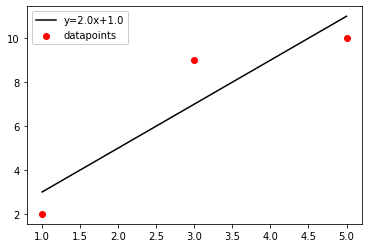

In [54]:
# Using best_line
best_line(X, Y)

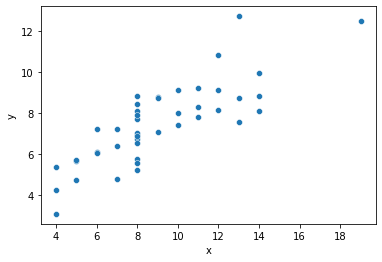

In [55]:
ans = sns.load_dataset('anscombe')
sns.scatterplot(data=ans, x='x', y='y');

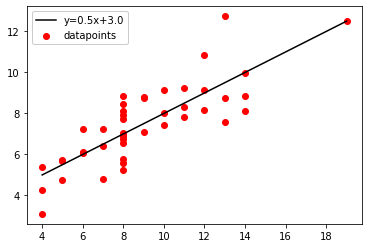

In [57]:
best_line(ans.x, ans.y)

The best-fit line exists no matter what my data look like!

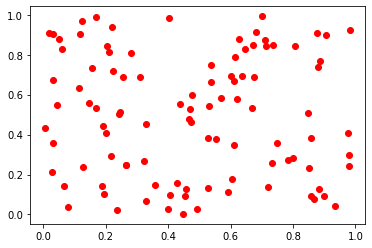

In [58]:
X_rand = stats.uniform.rvs(size=100)
Y_rand = stats.uniform.rvs(size=100)
plt.scatter(X_rand, Y_rand, c='red');

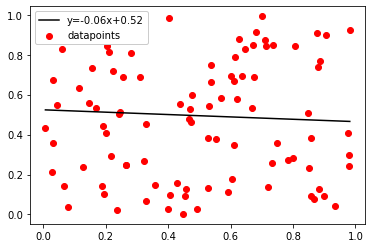

In [59]:
best_line(X_rand, Y_rand)

# Homework
>Code Simple Linear Regression from Scratch

<img src="images/equation.png" style="width:400px">

Note: on the below, we can use np for correlation coefficient etc

In [ ]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)"""
   
    # Calculate the means for both arrays

    
    # Calculate the difference between each observation
    # and the means for both arrays

    # Multiple the differences together

    
    # Sum the squared differences for each array
    # and multiple them together.
    # Take the square root of their product.

    
    # Calculate the correlation coefficient

    
    # Multiple the correlation coefficient
    # by the standard deviation of y 
    # divided by the standard deviation of x

    
    # Multiply beta_1 and the mean of the X
    # Subtract the product from the mean of Y

    
    # Plot the best fit line!
    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0
    plt.scatter(X, Y, label='datapoints', c='red')
    plt.plot(Xs, Ys, 'k', label=f'y={round(beta_1, 2)}x+{round(beta_0, 2)}')
    plt.legend(loc='upper left', framealpha=1)
    plt.show();